# 8. Optimum Index Factor (OIF)

### Por: David Alonso Rueda Rodríguez

### Objetivo:
- Calcular el OIF de imágenes satelitales

#### Esta actividad requiere la ejecución de las siguentes librerías:

- gdal
- numpy
- glob

## Fuente Original:


In [11]:
import glob
import os
import numpy as np
from osgeo import gdal

In [12]:
#
# Se obtienen el listado de bandas separadas sin cortes
urls = '../Datos/Landsat/*.TIF'
archivos = glob.glob(urls)
archivos

['../Datos/Landsat/LC08_L1TP_009057_20190903_20190917_01_T1_B1.TIF',
 '../Datos/Landsat/LC08_L1TP_009057_20190903_20190917_01_T1_B10.TIF',
 '../Datos/Landsat/LC08_L1TP_009057_20190903_20190917_01_T1_B11.TIF',
 '../Datos/Landsat/LC08_L1TP_009057_20190903_20190917_01_T1_B2.TIF',
 '../Datos/Landsat/LC08_L1TP_009057_20190903_20190917_01_T1_B3.TIF',
 '../Datos/Landsat/LC08_L1TP_009057_20190903_20190917_01_T1_B4.TIF',
 '../Datos/Landsat/LC08_L1TP_009057_20190903_20190917_01_T1_B5.TIF',
 '../Datos/Landsat/LC08_L1TP_009057_20190903_20190917_01_T1_B6.TIF',
 '../Datos/Landsat/LC08_L1TP_009057_20190903_20190917_01_T1_B7.TIF',
 '../Datos/Landsat/LC08_L1TP_009057_20190903_20190917_01_T1_B8.TIF',
 '../Datos/Landsat/LC08_L1TP_009057_20190903_20190917_01_T1_B9.TIF']

In [13]:
archivos[2]

'../Datos/Landsat/LC08_L1TP_009057_20190903_20190917_01_T1_B11.TIF'

In [14]:
#
#    Se han encontrado problemas con la banda 8, y estos impiden un
#  procesamiento adecuado de las estadísticas sin valores nan
#  por esta razón se elimina del listado de bandas para procesamiento
archivos.remove(archivos[1])
archivos.remove(archivos[1])
archivos.remove(archivos[7])
archivos

['../Datos/Landsat/LC08_L1TP_009057_20190903_20190917_01_T1_B1.TIF',
 '../Datos/Landsat/LC08_L1TP_009057_20190903_20190917_01_T1_B2.TIF',
 '../Datos/Landsat/LC08_L1TP_009057_20190903_20190917_01_T1_B3.TIF',
 '../Datos/Landsat/LC08_L1TP_009057_20190903_20190917_01_T1_B4.TIF',
 '../Datos/Landsat/LC08_L1TP_009057_20190903_20190917_01_T1_B5.TIF',
 '../Datos/Landsat/LC08_L1TP_009057_20190903_20190917_01_T1_B6.TIF',
 '../Datos/Landsat/LC08_L1TP_009057_20190903_20190917_01_T1_B7.TIF',
 '../Datos/Landsat/LC08_L1TP_009057_20190903_20190917_01_T1_B9.TIF']

In [15]:
def read_image(input_image_url, ret_type='nan'):
    dataset = gdal.Open(input_image_url)
    matriz = dataset.ReadAsArray()
    if ret_type == 'nan':
        matriz_nan = np.where(matriz == 0, np.nan, matriz)
        return matriz_nan
    else:
        return matriz

In [16]:
bandNumber = len(archivos)
bandArrays =[]
for archivo in archivos:
    band = read_image(archivo, ret_type='mat')
    bandArrays.append(band.flatten())

In [17]:
#
# Declaración de matriz de correlación
corrMatrix = np.zeros((bandNumber, bandNumber))
stdVector = np.zeros(bandNumber)
#
#   Inicialización de matriz de correlación
for i in range(bandNumber):
    stdVector[i] = np.std(bandArrays[i])
    for j in range(i):
        corrMatrix[j][i] = np.corrcoef(bandArrays[j], bandArrays[i])[0][1]

# Herramientas de GRASS

Esta actividad ha requerido más tiempo del estimado, para la entrega de la materia en curso se ha utilizado la herramienta de GRASS [i.oif](https://grass.osgeo.org/grass78/manuals/i.oif.html)

In [27]:
#
# Se debe hacer revisión completa al algoritmo en la siguiente dirección
url = 'https://github.com/OSGeo/grass/blob/master/scripts/i.oif/i.oif.py'

## Resultados OIF para imagen Landsat

In [23]:
landsat_url = 'src/Landsat/earthpy/Landsat_OIF.txt'

In [26]:
with open(landsat_url) as src:
    print('{}' .format('OIF imagen Landsat\n'))
    print(src.read())

OIF imagen Landsat

B04, B07, B08:  1605.3806
B04, B05, B08:  1582.5620
B04, B05, B07:  1571.0903
B02, B04, B08:  1569.4531
B02, B04, B07:  1560.1196
B03, B04, B08:  1552.0079
B04, B08, B11:  1550.1409
B01, B04, B08:  1548.8345
B03, B04, B07:  1543.4717
B02, B07, B08:  1540.4982
B04, B07, B11:  1540.2918
B04, B06, B08:  1536.0255
B01, B04, B07:  1531.9722
B05, B07, B08:  1526.3032
B04, B06, B07:  1526.0623
B02, B05, B08:  1525.8970
B02, B05, B07:  1515.9936
B01, B07, B08:  1512.7033
B03, B07, B08:  1511.2596
B04, B08, B12:  1509.3486
B03, B05, B08:  1506.4089
B01, B05, B08:  1503.1146
B02, B08, B11:  1499.7442
B04, B07, B12:  1497.4104
B03, B05, B07:  1497.3304
B02, B07, B11:  1491.3221
B02, B03, B08:  1490.8939
B01, B05, B07:  1486.0857
B01, B02, B08:  1484.0635
B02, B03, B07:  1483.8788
B05, B08, B11:  1483.8420
B01, B08, B11:  1479.4168
B02, B06, B08:  1475.9326
B05, B07, B11:  1473.8566
B03, B08, B11:  1472.0325
B01, B03, B08:  1470.2831
B01, B02, B07:  1469.1605
B02, B06, B07:  14

## Resultados OIF para imagen Sentinel

In [25]:
sentinel_url = 'src/Sentinel/earthpy/Sentinel_OIF.txt'

with open(sentinel_url) as src:
    print('{}' .format('OIF imagen Sentinel\n'))
    print(src.read())

OIF imagen Sentinel

Banda04, Banda05, Banda06:  9976.2033
Banda02, Banda05, Banda06:  9927.3550
Banda05, Banda06, Banda08:  9887.2179
Banda02, Banda04, Banda05:  9861.0661
Banda01, Banda05, Banda06:  9856.5822
Banda01, Banda04, Banda05:  9849.1146
Banda04, Banda05, Banda08:  9810.9165
Banda03, Banda05, Banda06:  9794.6021
Banda01, Banda02, Banda05:  9788.4363
Banda02, Banda05, Banda08:  9783.7301
Banda01, Banda05, Banda08:  9766.8087
Banda03, Banda04, Banda05:  9744.5752
Banda02, Banda03, Banda05:  9710.0478
Banda01, Banda03, Banda05:  9688.2610
Banda03, Banda05, Banda08:  9671.5126
Banda04, Banda05, Banda07:  9291.8322
Banda02, Banda05, Banda07:  9254.9498
Banda05, Banda07, Banda08:  9210.3933
Banda01, Banda05, Banda07:  9195.7182
Banda03, Banda05, Banda07:  9127.5323
Banda04, Banda05, Banda09:  8950.4461
Banda01, Banda02, Banda06:  8915.8612
Banda01, Banda04, Banda06:  8914.8575
Banda02, Banda04, Banda06:  8913.8782
Banda02, Banda06, Banda08:  8862.8845
Banda01, Banda06, Banda08:  8

## Demostración Coeficiente de Correlación Paramétrico y no Paramétrico

In [8]:
a = np.array([[1, 2, 3], [4, 5, 6]])
af = a.flatten()
af

array([1, 2, 3, 4, 5, 6])

In [16]:
b = np.array([[3, 4, 6], [7, 9,11]])
bf = b.flatten()
bf

array([ 3,  4,  6,  7,  9, 11])

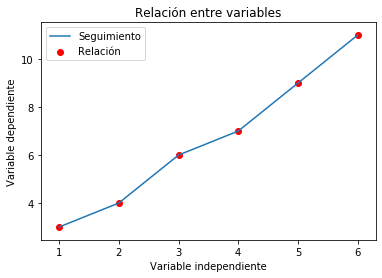

In [17]:
import matplotlib.pyplot as plt
plt.plot(af,bf, label='Seguimiento')
plt.scatter(af,bf, c='red', label='Relación')
plt.title('Relación entre variables')
plt.xlabel('Variable independiente')
plt.ylabel('Variable dependiente')
plt.legend()
plt.show()

In [18]:
from scipy.stats import shapiro
stat, p = shapiro(a)
stat_f, p_f = shapiro(af)
print(stat)
print(stat_f)
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

0.9818894863128662
0.9818894863128662
Sample looks Gaussian (fail to reject H0)


In [19]:
from scipy.stats import shapiro
stat, p = shapiro(b)
stat_f, p_f = shapiro(bf)
print(stat)
print(stat_f)
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

0.971271812915802
0.971271812915802
Sample looks Gaussian (fail to reject H0)


In [20]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
alpha = 0.05
stat, p = pearsonr(af,bf)
print('{:.6f}' .format(stat))
if p > alpha:
    print('With pearson method.\nSample looks independent (fail to reject H0)')
else:
    print('With pearson method.\nSample does not look independent (reject H0)')
stat, p = spearmanr(af,bf)
print('{:.6f}' .format(stat))
if p > alpha:
    print('With spearman method.\nSample looks independent (fail to reject H0)')
else:
    print('With spearman method.\nSample does not look independet (reject H0)')

0.994100
With pearson method.
Sample does not look independent (reject H0)
1.000000
With spearman method.
Sample does not look independet (reject H0)


## Otro Arreglo

In [91]:
a = np.array([[11, 12, 13, 14, 15],
              [21, 22, 23, 24, 25],
              [31, 32, 33, 34, 35],
              [41, 42, 43, 44, 45],
              [51, 52, 53, 54, 55]])

In [102]:
print(a[0,0] , a[0,1] , a[0,2])
print(a[0,0] , a[0,1] , a[0,3])
print(a[0,0] , a[0,1] , a[0,4])

11 12 13
11 12 14
11 12 15


In [109]:
for i in range(len(a)):
    for j in range(len(a)):
        print(a[i, j])

11
12
13
14
15
21
22
23
24
25
31
32
33
34
35
41
42
43
44
45
51
52
53
54
55


In [74]:
B = np.array([[2,3,4]]).transpose()
B

array([[2],
       [3],
       [4]])

In [75]:
A.dot(B)

array([[20]])